# 7장 선형회귀 (Regression analysis)

* "부록3 매트플롯립 입문"에서 한글 폰트를 올바르게 출력하기 위한 설치 방법을 설명했다. 설치 방법은 다음과 같다.

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [1]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# Colab, Linux
# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

# Window 
# font_name = "NanumBarunGothic"

# Mac
# font_name = "AppleGothic"

In [58]:
# 파이토치 관련 라이브러리
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchviz import make_dot
from torchinfo import summary

# Boston dataset
import pandas  as pd

In [3]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True
plt.rcParams["grid.linestyle"] = ":"

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [4]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

## 단순 선형 회귀 분석

### 입력 :1 출력 :1인 선형 함수

In [32]:
# 난수 시드값 고정
torch.manual_seed(123)

# 입력 :1 출력 :1 선형 함수의 정의
l1 = nn.Linear(1, 1)

# 선형 함수 확인
print(l1)
# print(list(l1.parameters()))
print(list(l1.named_parameters()))

Linear(in_features=1, out_features=1, bias=True)
[('weight', Parameter containing:
tensor([[-0.4078]], requires_grad=True)), ('bias', Parameter containing:
tensor([0.0331], requires_grad=True))]


In [40]:
### Check named parameters
name, tensor = list(l1.named_parameters())[0]
print(name, tensor[0], tensor[0].shape)

weight tensor([-0.4078], grad_fn=<SelectBackward0>) torch.Size([1])


In [41]:
# 파라미터명, 파라미터 값, shape 표시

for param in l1.named_parameters():
    print('name: ', param[0])
    print('tensor: ', param[1])
    print('shape: ', param[1].shape)
    print("="*50)

name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [42]:
# 초깃값 설정
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

# 결과 확인
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [5]:
# 테스트용 데이터 생성

# x_np를 넘파이 배열로 정의
x_np = np.arange(-2, 2.1, 1) # float64

# 텐서 변수화
x = torch.tensor(x_np) # float32
print("x = \n", x)

# (N,1) 사이즈로 변경
x = x.view(-1,1)
print("x.view(-1,1) = \n", x)

# 결과 확인
print(x.shape)
print(x)

x = 
 tensor([-2., -1.,  0.,  1.,  2.], dtype=torch.float64)
x.view(-1,1) = 
 tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]], dtype=torch.float64)
torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]], dtype=torch.float64)


### 입력 :2 개 출력 :1인 선형 함수

In [6]:
# 입력 :2, 출력:1 선형 함수 정의
l2 = nn.Linear(2, 1)
print("Initial weights and bias", "="*50)
print(l2.weight)
print(l2.bias)
print()

# 초깃값 설정
print("constant weights and bias", "="*50)
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

# 결과 확인
print(l2.weight)
print(l2.bias)

Initial weights and bias ==================================================
Parameter containing:
tensor([[ 0.3517, -0.1199]], requires_grad=True)
Parameter containing:
tensor([0.4404], requires_grad=True)

constant weights and bias ==================================================
Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [14]:
# 2차원 넘파이 배열
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1,1]])

# 텐서 변수화
x2 =  torch.tensor(x2_np).float()

# 결과 확인
print(x2.shape)
print(x2)

# 함수 값 계산
y2 = l2(x2)

# shape 확인
print(y2.shape)

# 값 확인
print(y2.data)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


### 입력 :2, 출력 :3 선형 함수 정의

In [21]:
# 입력 :2, 출력 :3 선형 함수 정의

l3 = nn.Linear(2, 3)

# 초깃값 설정
nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

# 결과 확인
print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [22]:
# 함수 값 계산
y3 = l3(x2)

# shape 확인
print(y3.shape)

# 값 확인
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


### 클래스를 이용한 모델 정의

In [129]:
# 모델 정의

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  부모 클래스 nn.Module 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(n_input, n_output)   
        
    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

# 더미 입력
inputs = torch.rand(100,1)
labels1 = torch.rand(100,1)

# 인스턴스 생성(１ 입력, 1 출력 선형 모델)
n_input = 1
n_output = 1
net = Net(n_input, n_output)

In [130]:
print(net)
print(net.l1)
print(net.l1.weight)
print(net.l1.bias)


Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)
Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.2807]], requires_grad=True)
Parameter containing:
tensor([0.1153], requires_grad=True)


In [131]:
# 예측
# torch.matmul(inputs, net.l1.weight) + net.l1.bias
outputs = net(inputs)
print("outputs = \n", outputs)

outputs = 
 tensor([[ 0.0299],
        [-0.1052],
        [ 0.0142],
        [ 0.0830],
        [-0.1171],
        [ 0.0077],
        [-0.0826],
        [-0.1300],
        [-0.0144],
        [ 0.0988],
        [ 0.0426],
        [-0.0655],
        [-0.1356],
        [ 0.0723],
        [-0.1526],
        [ 0.0517],
        [-0.1634],
        [-0.1542],
        [-0.1236],
        [-0.1487],
        [-0.1008],
        [-0.0133],
        [-0.1299],
        [-0.0125],
        [-0.1334],
        [ 0.0034],
        [ 0.0427],
        [ 0.0464],
        [ 0.0978],
        [ 0.0616],
        [-0.0946],
        [-0.0667],
        [-0.0763],
        [-0.0570],
        [-0.1402],
        [ 0.0780],
        [ 0.0836],
        [-0.0868],
        [-0.0448],
        [-0.1312],
        [ 0.0127],
        [-0.0350],
        [-0.1323],
        [-0.0303],
        [-0.0595],
        [-0.0311],
        [-0.0774],
        [-0.0619],
        [ 0.0519],
        [-0.0652],
        [-0.0895],
        [-0.1640],


### MSELoss 클래스를 이용한 손실 함수

In [132]:
criterion = nn.MSELoss()

In [133]:
loss = criterion(outputs, labels1)
print("loss = ", loss)
loss.backward()

loss =  tensor(0.3831, grad_fn=<MseLossBackward0>)


In [136]:
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-0.6195]])
tensor([-1.0809])


## 회귀 분석 예제: Boston dataset

In [ ]:
# 학습용 데이터셋 준비

# '보스턴 데이터셋'은 현재 사이킷런 라이브러리에서 가져올 수 있지만,
# 사이킷런에서 앞으로 이 데이터를 사용할 수 없기 때문에 웹 url에서 직접 수집

#  Variables in order:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's

# CRIM: 인구당 마을별 범죄율
# ZN: 25,000 평방피트를 초과하는 주거용 토지 비율
# INDUS: 마을별 비소매업 지역 비율
# CHAS: 찰스강 더미 변수 (강과 접한 지역 = 1, 그렇지 않으면 = 0)
# NOX: 질소 산화물 농도 (1000만 분의 1 단위)
# RM: 주택당 평균 방 개수
# AGE: 1940년 이전에 건축된 자가 소유 주택의 비율
# DIS: 보스턴 주요 고용 센터 5곳까지의 가중 거리
# RAD: 방사형 고속도로 접근성 지수
# TAX: $10,000당 재산세율
# PTRATIO: 마을별 학생-교사 비율
# B: 1000(Bk - 0.63)^2, 여기서 Bk는 마을별 흑인 인구 비율
# LSTAT: 저소득층 인구 비율
# MEDV: 자가 소유 주택의 중간값 ($1000 단위)

In [59]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
                     skiprows=22, header=None)
print(raw_df.head(10))


          0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8
5  392.83000   4.03  34.70  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
6    0.03237   0.00   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7
7  394.63000   2.94  33.40  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
8    0.06905   0.00   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7
9  396.90000   5.33  36.20  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN


In [63]:

x_org = np.hstack([raw_df.values[::2, :],
                   raw_df.values[1::2, :2]]) # 짝수줄 전체, 홀 수 줄 [: 2] => Features
# x_org[:10, :5]

array([[ 0.0063, 18.    ,  2.31  ,  0.    ,  0.538 ],
       [ 0.0273,  0.    ,  7.07  ,  0.    ,  0.469 ],
       [ 0.0273,  0.    ,  7.07  ,  0.    ,  0.469 ],
       [ 0.0324,  0.    ,  2.18  ,  0.    ,  0.458 ],
       [ 0.0691,  0.    ,  2.18  ,  0.    ,  0.458 ],
       [ 0.0299,  0.    ,  2.18  ,  0.    ,  0.458 ],
       [ 0.0883, 12.5   ,  7.87  ,  0.    ,  0.524 ],
       [ 0.1446, 12.5   ,  7.87  ,  0.    ,  0.524 ],
       [ 0.2112, 12.5   ,  7.87  ,  0.    ,  0.524 ],
       [ 0.17  , 12.5   ,  7.87  ,  0.    ,  0.524 ]])

In [65]:
yt = raw_df.values[1::2, 2] ## Target
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                          'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# 결과 확인
print('원본 데이터', x_org.shape, yt.shape)
print('항목명: ', feature_names)

원본 데이터 (506, 13) (506,)
항목명:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [66]:
x_org[:5]
feature_names == 'RM'

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False])

In [67]:
# 데이터 추출(RM 항목)
x = x_org[:,feature_names == 'RM']
print('추출 후', x.shape)
print(x[:5,:])

# 정답 데이터 y 표시
print('정답 데이터')
print(yt[:5])

추출 후 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
정답 데이터
[24.  21.6 34.7 33.4 36.2]


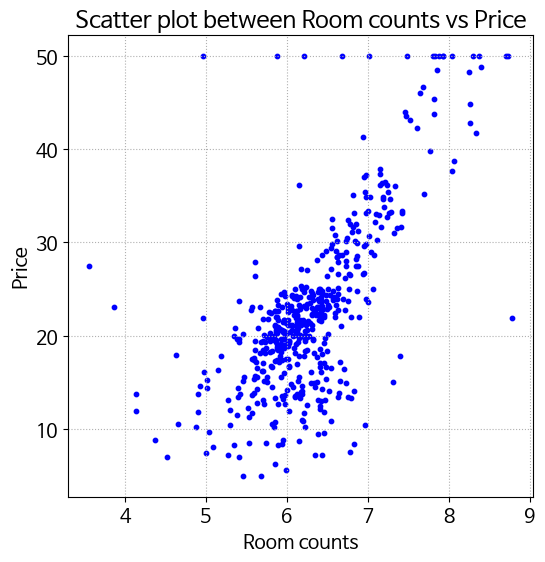

In [71]:
# 산포도 출력

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('Room counts')
plt.ylabel('Price')
plt.title(' Scatter plot between Room counts vs Price ')
plt.show()

### 단순 선형 회귀

In [72]:
## 회귀모델

# 입력 차원수
n_input= x.shape[1]

# 출력 차원수
n_output = 1

print(f'입력 차원수: {n_input}  출력 차원수: {n_output}')

# 머신러닝 모델(예측 모델)의 클래스 정의

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  부모 클래스 nn.Module 초기화
        super().__init__()

        # 출력층 정의
        self.l1 = nn.Linear(n_input, n_output)   
        
        # 초깃값을 모두 1로 설정
        # "딥러닝을 위한 수학"과 조건을 맞추기 위함
        # nn.init.constant_(self.l1.weight, 1.0)
        # nn.init.constant_(self.l1.bias, 1.0)

    # 예측 함수 정의
    def forward(self, x):
        x1 = self.l1(x) # 선형 회귀
        return x1

입력 차원수: 1  출력 차원수: 1


In [76]:
# 인스턴스 생성
# １입력 1출력 선형 모델

net = Net(n_input, n_output)

# 모델 안의 파라미터를 확인
for parameter in net.named_parameters():
    print(f'변수명: {parameter[0]}')
    print(f'변숫값: {parameter[1].data}')
print("="*50)
# 파라미터 리스트를 가져오기 위해 parameters 함수를 사용
for parameter in net.parameters():
    print(parameter)

변수명: l1.weight
변숫값: tensor([[-0.0646]])
변수명: l1.bias
변숫값: tensor([0.4075])
Parameter containing:
tensor([[-0.0646]], requires_grad=True)
Parameter containing:
tensor([0.4075], requires_grad=True)


In [77]:
print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [86]:
# from torchsummary import summary
from torchinfo import summary

summary(net, (1,), device = 'cpu')

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [87]:
# 손실 함수： 평균 제곱 오차
criterion = nn.MSELoss()

# 학습률
lr = 0.01

# 최적화 함수: 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

In [88]:
# 입력값 x와 정답 yt의 텐서 변수화
# inputs = torch.tensor(x).float()
# labels = torch.tensor(yt).float()
inputs = torch.tensor(x, dtype = torch.float32)
labels = torch.tensor(yt, dtype = torch.float32)

# 차원 수 확인

print(inputs.shape, inputs.dtype)
print(labels.shape, labels.dtype)

torch.Size([506, 1]) torch.float32
torch.Size([506]) torch.float32


In [89]:
# 손실 계산을 위해 labels를 (N,1) 차원의 행렬로 변환

labels1 = labels.view((-1, 1))

# 차원 수 확인
print("label shape = ", labels1.shape)

# 예측 계산

outputs = net(inputs)
print(outputs.dtype)
print(outputs.dtype)


# 손실 계산
loss = criterion(outputs, labels1)

# 손실 값 가져오기
print(f'{loss.item():.5f}')

label shape =  torch.Size([506, 1])
torch.float32
torch.float32
592.64532


In [93]:
dict(net.named_parameters())

{'l1.weight': Parameter containing:
 tensor([[-0.0646]], requires_grad=True),
 'l1.bias': Parameter containing:
 tensor([0.4075], requires_grad=True)}

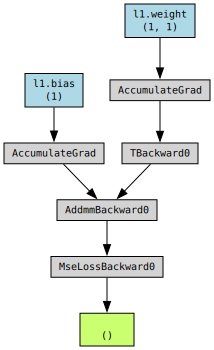

In [95]:
# 손실을 그래프로 나타내기
from torchviz import make_dot

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [97]:
# 예측 계산
outputs = net(inputs)

# 손실 계산
loss = criterion(outputs, labels1)

# 경사 계산
loss.backward()

# 경사 계산 결과를 취득 가능하도록 함
print("net.l1.weight.grad = ", net.l1.weight.grad)
print("net.l1.bias.grad = ", net.l1.bias.grad)

# 파라미터 수정
optimizer.step()

# 파라미터 확인
print("="*50)
print(net.l1.weight)
print(net.l1.bias)

# 경삿값 초기화
optimizer.zero_grad()

# 경삿값을 모두 0으로 함
print("="*50)
print(net.l1.weight.grad)
print(net.l1.bias.grad)

net.l1.weight.grad =  tensor([[-52.8446]])
net.l1.bias.grad =  tensor([-7.4295])
Parameter containing:
tensor([[3.3862]], requires_grad=True)
Parameter containing:
tensor([0.9325], requires_grad=True)
None
None


### 경사 하강법을 이용한 학습 

In [99]:
# 학습률
lr = 0.01

# 인스턴스 생성(파라미터 값 초기화)
net = Net(n_input, n_output)

# 손실 함수：평균 제곱 오차
criterion = nn.MSELoss()

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 50000

# 평가 결과 기록(손실 값만 기록)
history = np.zeros((0,2))

In [100]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경삿값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)
  
    # 손실 계산
    # "딥러닝을 위한 수학"에 나온 결과와 맞추기 위해 2로 나눈 값을 손실로 정의
    loss = criterion(outputs, labels1) / 2.0

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 329.38986
Epoch 100 loss: 29.67661
Epoch 200 loss: 29.48945
Epoch 300 loss: 29.30674
Epoch 400 loss: 29.12838
Epoch 500 loss: 28.95425
Epoch 600 loss: 28.78426
Epoch 700 loss: 28.61830
Epoch 800 loss: 28.45630
Epoch 900 loss: 28.29814
Epoch 1000 loss: 28.14374
Epoch 1100 loss: 27.99300
Epoch 1200 loss: 27.84585
Epoch 1300 loss: 27.70220
Epoch 1400 loss: 27.56196
Epoch 1500 loss: 27.42505
Epoch 1600 loss: 27.29140
Epoch 1700 loss: 27.16092
Epoch 1800 loss: 27.03354
Epoch 1900 loss: 26.90919
Epoch 2000 loss: 26.78779
Epoch 2100 loss: 26.66928
Epoch 2200 loss: 26.55358
Epoch 2300 loss: 26.44064
Epoch 2400 loss: 26.33038
Epoch 2500 loss: 26.22273
Epoch 2600 loss: 26.11765
Epoch 2700 loss: 26.01506
Epoch 2800 loss: 25.91491
Epoch 2900 loss: 25.81713
Epoch 3000 loss: 25.72169
Epoch 3100 loss: 25.62851
Epoch 3200 loss: 25.53755
Epoch 3300 loss: 25.44874
Epoch 3400 loss: 25.36205
Epoch 3500 loss: 25.27741
Epoch 3600 loss: 25.19479
Epoch 3700 loss: 25.11413
Epoch 3800 loss: 25.035

In [101]:
# 초기 손실값과 최종 손실값

print(f'초기 손실값: {history[0,1]:.5f}')
print(f'최종 손실값: {history[-1,1]:.5f}')

초기 손실값: 329.38986
최종 손실값: 21.80033


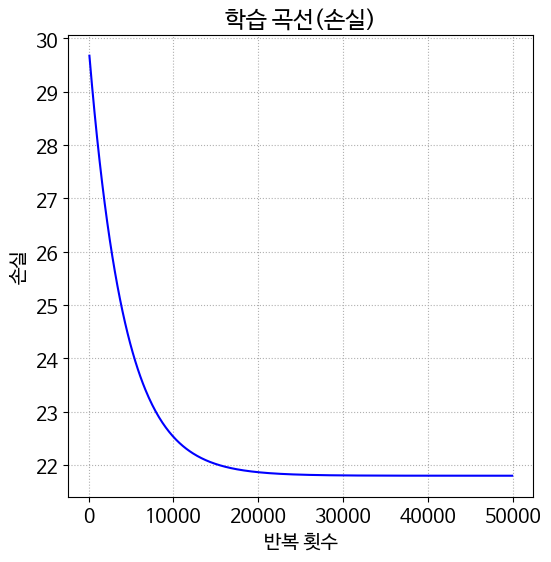

In [102]:
# 학습 곡선 출력(손실) 
# 가장 처음 요소는 제외

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

[[-2.2187]
 [45.2119]]


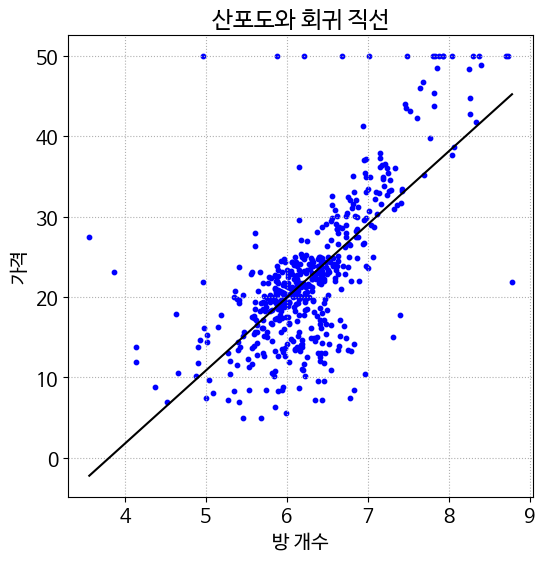

In [103]:
# 회귀 직선 산출

# x의 최솟값, 최댓값
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

# 산포도와 회귀 직선 출력

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('방 개수')
plt.ylabel('가격')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('산포도와 회귀 직선')
plt.show()

### 중회귀 모델

In [109]:
# 열(LSTAT: 저소득자 비율) 추가

x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))

# shape 표시
print(x2.shape)

# 입력 데이터 x 표시
print(x2[:5,:])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [110]:
# 입력 차원수=2

n_input = x2.shape[1]
print(n_input)

# 모델 인스턴스 생성
net = Net(n_input, n_output)

2


In [111]:
# 모델 안의 파라미터 확인
# predict.weight가 2차원으로 바뀜

for parameter in net.named_parameters():
    print(f'변수명: {parameter[0]}')
    print(f'변숫값: {parameter[1].data}')

변수명: l1.weight
변숫값: tensor([[ 0.1497, -0.1793]])
변수명: l1.bias
변숫값: tensor([0.3404])


In [112]:
# 모델의 개요 표시

from torchinfo import summary
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [113]:
# 입력 변수 x2를 텐서로 변환 
# labels, labels1은 이전과 같음

# inputs = torch.tensor(x2).float()
inputs = torch.tensor(x2, dtype = torch.float32)

# 초기화 처리

# 학습률
# lr = 0.01
lr = 0.001


# 인스턴스 생성(파라미터 값 초기화)
net = Net(n_input, n_output)

# 손실 함수：평균 제곱 오차
criterion = nn.MSELoss()

# 최적화 함수 : 경사 하강법
optimizer = optim.SGD(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 50000

# 평가 결과 기록(손실 값만 기록)
history = np.zeros((0,2))


In [114]:
# 반복 계산 메인 루프

for epoch in range(num_epochs):
    
    # 경삿값 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)
  
    # 오차 계산
    # "딥러닝을 위한 수학"에 나온 결과와 맞추기 위해 2로 나눈 값을 손실로 정의
    loss = criterion(outputs, labels1) / 2.0

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 100회 마다 도중 경과를 기록
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 201.20293
Epoch 100 loss: 30.78225
Epoch 200 loss: 16.97313
Epoch 300 loss: 15.45174
Epoch 400 loss: 15.28411
Epoch 500 loss: 15.26564
Epoch 600 loss: 15.26360
Epoch 700 loss: 15.26336
Epoch 800 loss: 15.26333
Epoch 900 loss: 15.26332
Epoch 1000 loss: 15.26331
Epoch 1100 loss: 15.26330
Epoch 1200 loss: 15.26329
Epoch 1300 loss: 15.26329
Epoch 1400 loss: 15.26328
Epoch 1500 loss: 15.26327
Epoch 1600 loss: 15.26326
Epoch 1700 loss: 15.26325
Epoch 1800 loss: 15.26325
Epoch 1900 loss: 15.26324
Epoch 2000 loss: 15.26323
Epoch 2100 loss: 15.26322
Epoch 2200 loss: 15.26321
Epoch 2300 loss: 15.26320
Epoch 2400 loss: 15.26320
Epoch 2500 loss: 15.26319
Epoch 2600 loss: 15.26318
Epoch 2700 loss: 15.26317
Epoch 2800 loss: 15.26316
Epoch 2900 loss: 15.26316
Epoch 3000 loss: 15.26315
Epoch 3100 loss: 15.26314
Epoch 3200 loss: 15.26313
Epoch 3300 loss: 15.26312
Epoch 3400 loss: 15.26311
Epoch 3500 loss: 15.26311
Epoch 3600 loss: 15.26310
Epoch 3700 loss: 15.26309
Epoch 3800 loss: 15.263

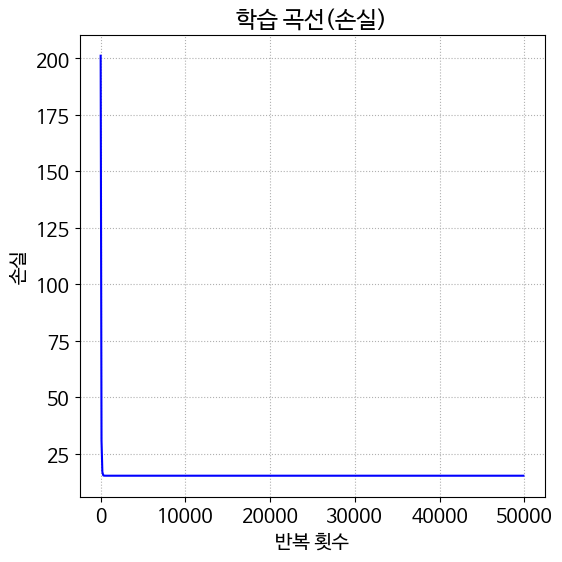

In [115]:
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()